In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans
import warnings
warnings.filterwarnings('ignore')

In [56]:
groceries = []
with open(r'..\Datasets\DataSetA.csv', 'r') as f:groceries = f.read()
groceries = groceries.split('\n')


In [57]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(','))

In [58]:
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

array([[ True, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False]])

In [59]:
fp_df = pd.DataFrame(te_ary[:,1:], columns=te.columns_[1:])


In [60]:
fp_df

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12522,True,False,True,True,False,False,False,False,True,False,False,False
12523,True,False,True,False,False,False,True,False,False,False,False,True
12524,True,False,True,False,True,False,False,False,True,False,False,True
12525,True,False,False,False,False,False,False,True,False,False,False,True


In [61]:
itemFreq = fp_df.sum(axis=0) / len(fp_df)

In [62]:
# By spliting first 10 
# itemFreq = itemFreq.sort_values(ascending=False)
# ax = itemFreq[:10].plot.barh(color='blue')

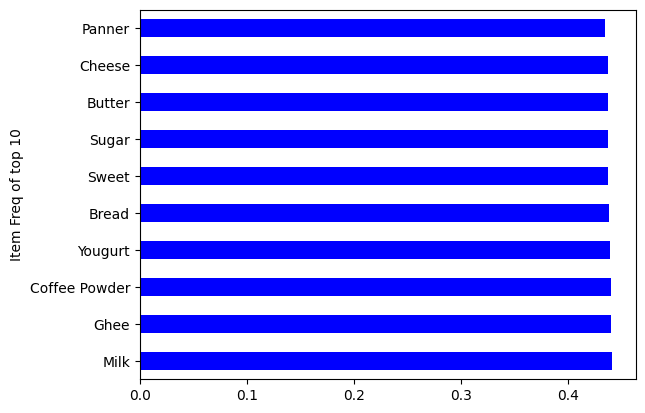

In [63]:
# Without spliting (using nlargest)
ax = itemFreq.nlargest(10).plot.barh(color='blue')

plt.ylabel('Item Freq of top 10')
plt.show()

In [64]:
# fp_df = fp_df.astype(bool)
itemsets = apriori(fp_df, min_support=0.01, use_colnames=True)

In [65]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Sugar, Sweet)",(Butter),0.199170,0.437535,0.099705,0.500601,1.144140,0.012561,1.126284,0.157313
1,"(Panner, Sweet)",(Lassi),0.199968,0.433623,0.100982,0.504990,1.164582,0.014271,1.144172,0.176647
2,"(Panner, Lassi)",(Sweet),0.199329,0.437695,0.100982,0.506608,1.157446,0.013736,1.139673,0.169894
3,"(Tea Powder, Bread, Butter)",(Yougurt),0.089886,0.439291,0.045182,0.502664,1.144262,0.005696,1.127425,0.138526
4,"(Cheese, Coffee Powder, Panner)",(Bread),0.093478,0.437774,0.046779,0.500427,1.143116,0.005857,1.125412,0.138108
...,...,...,...,...,...,...,...,...,...,...
631,"(Sugar, Lassi, Tea Powder, Yougurt, Ghee)",(Milk),0.020196,0.441127,0.010218,0.505929,1.146900,0.001309,1.131159,0.130725
632,"(Milk, Lassi, Tea Powder, Yougurt, Ghee)",(Sugar),0.020356,0.437615,0.010218,0.501961,1.147038,0.001310,1.129199,0.130853
633,"(Sugar, Milk, Panner, Lassi, Tea Powder)",(Sweet),0.021873,0.437695,0.011336,0.518248,1.184041,0.001762,1.167210,0.158910
634,"(Sugar, Milk, Panner, Sweet, Tea Powder)",(Lassi),0.021713,0.433623,0.011336,0.522059,1.203945,0.001920,1.185034,0.173157


In [66]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                   antecedents consequents   support  \
0                               (Sugar, Sweet)    (Butter)  0.099705   
1                              (Panner, Sweet)     (Lassi)  0.100982   
2                              (Panner, Lassi)     (Sweet)  0.100982   
3                  (Tea Powder, Bread, Butter)   (Yougurt)  0.045182   
4              (Cheese, Coffee Powder, Panner)     (Bread)  0.046779   
..                                         ...         ...       ...   
631  (Sugar, Lassi, Tea Powder, Yougurt, Ghee)      (Milk)  0.010218   
632   (Milk, Lassi, Tea Powder, Yougurt, Ghee)     (Sugar)  0.010218   
633   (Sugar, Milk, Panner, Lassi, Tea Powder)     (Sweet)  0.011336   
634   (Sugar, Milk, Panner, Sweet, Tea Powder)     (Lassi)  0.011336   
635      (Sugar, Milk, Panner, Sweet, Yougurt)     (Lassi)  0.010378   

     confidence      lift  
0      0.500601  1.144140  
1      0.504990  1.164582  
2      0.506608  1.157446  
3      0.502664  1.1442

In [67]:
rules.sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
457,"(Panner, Bread, Sweet, Tea Powder, Ghee)",(Lassi),0.019877,0.433623,0.011096,0.558233,1.287368,0.002477,1.282071,0.227748
630,"(Milk, Panner, Sweet, Tea Powder, Ghee)",(Lassi),0.019717,0.433623,0.010936,0.554656,1.279119,0.002386,1.271773,0.222601
615,"(Sugar, Coffee Powder, Panner, Sweet, Tea Powder)",(Lassi),0.021234,0.433623,0.011735,0.552632,1.274451,0.002527,1.266018,0.220020
437,"(Coffee Powder, Panner, Bread, Sweet, Tea Powder)",(Lassi),0.020675,0.433623,0.011415,0.552124,1.273279,0.002450,1.264582,0.219157
324,"(Tea Powder, Panner, Ghee, Sweet)",(Lassi),0.042388,0.433623,0.023389,0.551789,1.272508,0.005009,1.263639,0.223629
523,"(Coffee Powder, Milk, Sweet, Tea Powder, Butter)",(Sugar),0.021234,0.437615,0.011814,0.556391,1.271417,0.002522,1.267750,0.218108


In [68]:
rule_df = rules.sort_values(by=['lift', 'confidence'], ascending=False)
rule_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
457,"(Panner, Bread, Sweet, Tea Powder, Ghee)",(Lassi),0.019877,0.433623,0.011096,0.558233,1.287368,0.002477,1.282071,0.227748
630,"(Milk, Panner, Sweet, Tea Powder, Ghee)",(Lassi),0.019717,0.433623,0.010936,0.554656,1.279119,0.002386,1.271773,0.222601
615,"(Sugar, Coffee Powder, Panner, Sweet, Tea Powder)",(Lassi),0.021234,0.433623,0.011735,0.552632,1.274451,0.002527,1.266018,0.220020
437,"(Coffee Powder, Panner, Bread, Sweet, Tea Powder)",(Lassi),0.020675,0.433623,0.011415,0.552124,1.273279,0.002450,1.264582,0.219157
324,"(Tea Powder, Panner, Ghee, Sweet)",(Lassi),0.042388,0.433623,0.023389,0.551789,1.272508,0.005009,1.263639,0.223629
...,...,...,...,...,...,...,...,...,...,...
102,"(Tea Powder, Bread, Butter, Panner)",(Ghee),0.042468,0.439850,0.021234,0.500000,1.136751,0.002554,1.120300,0.125636
449,"(Milk, Lassi, Bread, Sweet, Tea Powder)",(Ghee),0.021713,0.439850,0.010857,0.500000,1.136751,0.001306,1.120300,0.122970
559,"(Cheese, Coffee Powder, Milk, Panner, Lassi)",(Ghee),0.021394,0.439850,0.010697,0.500000,1.136751,0.001287,1.120300,0.122930
241,"(Sugar, Butter, Lassi, Tea Powder)",(Milk),0.043586,0.441127,0.021793,0.500000,1.133460,0.002566,1.117746,0.123112


In [69]:
print(rule_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                           antecedents consequents   support  \
457           (Panner, Bread, Sweet, Tea Powder, Ghee)     (Lassi)  0.011096   
630            (Milk, Panner, Sweet, Tea Powder, Ghee)     (Lassi)  0.010936   
615  (Sugar, Coffee Powder, Panner, Sweet, Tea Powder)     (Lassi)  0.011735   
437  (Coffee Powder, Panner, Bread, Sweet, Tea Powder)     (Lassi)  0.011415   
324                  (Tea Powder, Panner, Ghee, Sweet)     (Lassi)  0.023389   
..                                                 ...         ...       ...   
102                (Tea Powder, Bread, Butter, Panner)      (Ghee)  0.021234   
449            (Milk, Lassi, Bread, Sweet, Tea Powder)      (Ghee)  0.010857   
559       (Cheese, Coffee Powder, Milk, Panner, Lassi)      (Ghee)  0.010697   
241                 (Sugar, Butter, Lassi, Tea Powder)      (Milk)  0.021793   
627  (Sugar, Coffee Powder, Panner, Sweet, Tea Powder)      (Milk)  0.010617   

     confidence      lift  
457    0.55

In [70]:
relv_df = rule_df[rule_df['lift']>1]
relv_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
457,"(Panner, Bread, Sweet, Tea Powder, Ghee)",(Lassi),0.019877,0.433623,0.011096,0.558233,1.287368,0.002477,1.282071,0.227748
630,"(Milk, Panner, Sweet, Tea Powder, Ghee)",(Lassi),0.019717,0.433623,0.010936,0.554656,1.279119,0.002386,1.271773,0.222601
615,"(Sugar, Coffee Powder, Panner, Sweet, Tea Powder)",(Lassi),0.021234,0.433623,0.011735,0.552632,1.274451,0.002527,1.266018,0.220020
437,"(Coffee Powder, Panner, Bread, Sweet, Tea Powder)",(Lassi),0.020675,0.433623,0.011415,0.552124,1.273279,0.002450,1.264582,0.219157
324,"(Tea Powder, Panner, Ghee, Sweet)",(Lassi),0.042388,0.433623,0.023389,0.551789,1.272508,0.005009,1.263639,0.223629
...,...,...,...,...,...,...,...,...,...,...
102,"(Tea Powder, Bread, Butter, Panner)",(Ghee),0.042468,0.439850,0.021234,0.500000,1.136751,0.002554,1.120300,0.125636
449,"(Milk, Lassi, Bread, Sweet, Tea Powder)",(Ghee),0.021713,0.439850,0.010857,0.500000,1.136751,0.001306,1.120300,0.122970
559,"(Cheese, Coffee Powder, Milk, Panner, Lassi)",(Ghee),0.021394,0.439850,0.010697,0.500000,1.136751,0.001287,1.120300,0.122930
241,"(Sugar, Butter, Lassi, Tea Powder)",(Milk),0.043586,0.441127,0.021793,0.500000,1.133460,0.002566,1.117746,0.123112


In [71]:
print(relv_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                           antecedents consequents   support  \
457           (Panner, Bread, Sweet, Tea Powder, Ghee)     (Lassi)  0.011096   
630            (Milk, Panner, Sweet, Tea Powder, Ghee)     (Lassi)  0.010936   
615  (Sugar, Coffee Powder, Panner, Sweet, Tea Powder)     (Lassi)  0.011735   
437  (Coffee Powder, Panner, Bread, Sweet, Tea Powder)     (Lassi)  0.011415   
324                  (Tea Powder, Panner, Ghee, Sweet)     (Lassi)  0.023389   
..                                                 ...         ...       ...   
102                (Tea Powder, Bread, Butter, Panner)      (Ghee)  0.021234   
449            (Milk, Lassi, Bread, Sweet, Tea Powder)      (Ghee)  0.010857   
559       (Cheese, Coffee Powder, Milk, Panner, Lassi)      (Ghee)  0.010697   
241                 (Sugar, Butter, Lassi, Tea Powder)      (Milk)  0.021793   
627  (Sugar, Coffee Powder, Panner, Sweet, Tea Powder)      (Milk)  0.010617   

     confidence      lift  
457    0.55